Predict Water Drinkability

In [512]:
# !pip install opendatasets -q

Importing Libraries

In [513]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# import opendatasets as od



In [514]:
# # Download dataset
# od.download("https://www.kaggle.com/datasets/balavashan/drinking-water-dataset")

In [515]:
# from google.colab import drive
# drive.mount('/content/drive')

Importing The Dataset

In [516]:
dataset = pd.read_csv('/content/water_drinkability.csv')
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [517]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Drinkable        3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [518]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Drinkable,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [519]:
dataset.isnull().sum() #Get the count of null values in each columns

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Drinkable,0


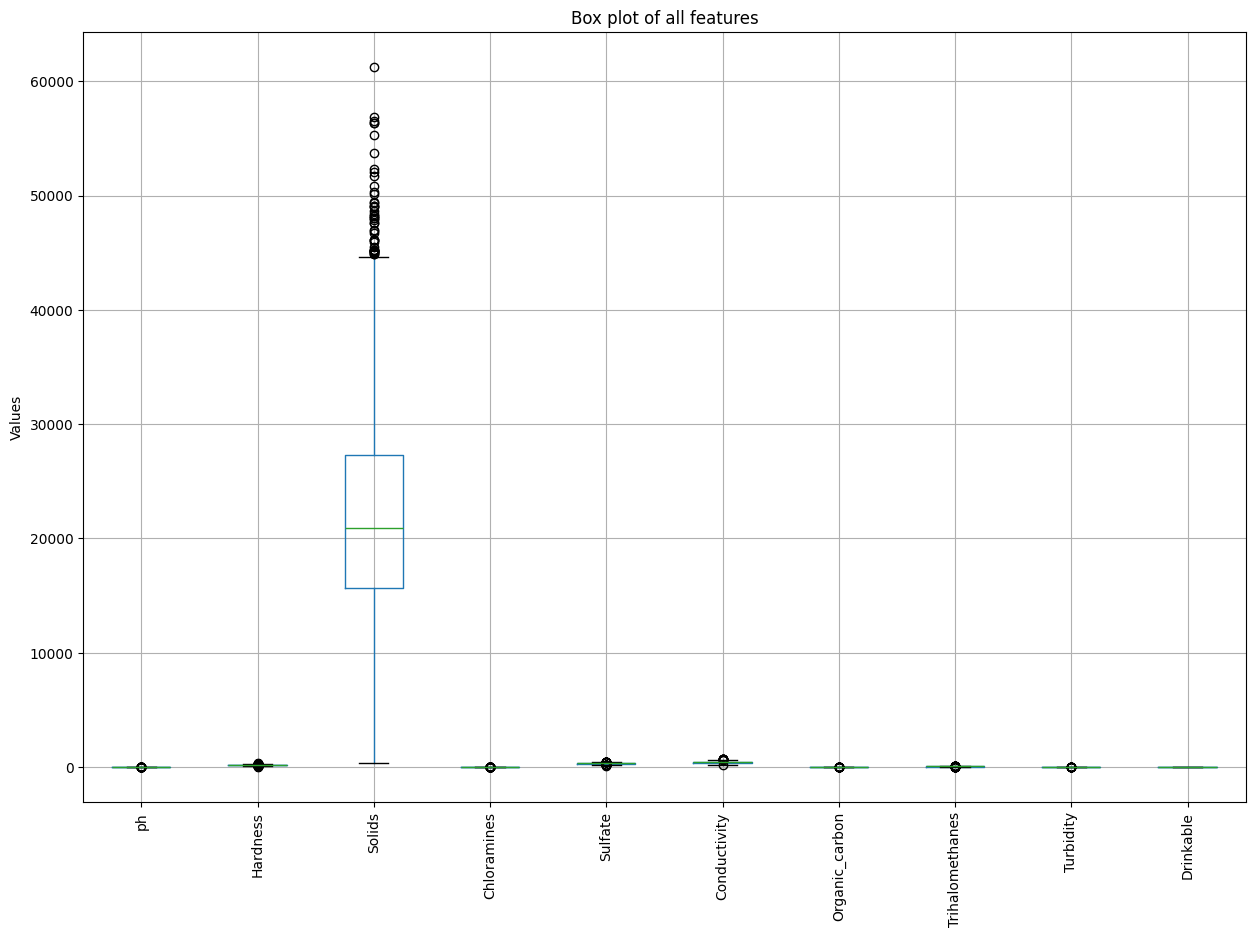

In [520]:
# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
dataset.boxplot()
plt.title('Box plot of all features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Solids'>

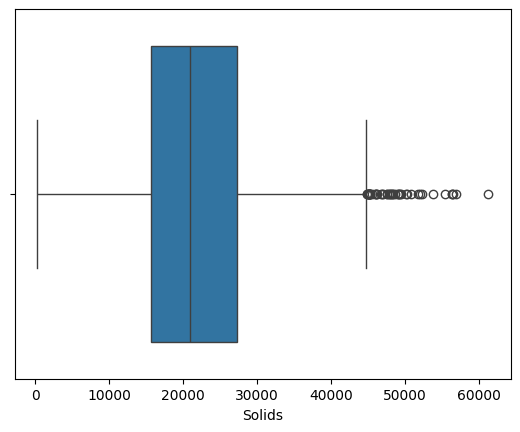

In [521]:
sns.boxplot(x=dataset['Solids'])

In [522]:
# Identify columns with outliers from the boxplot
outlier_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

df_cleaned = dataset.copy()

for col in outlier_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned[col] = df_cleaned[col].clip(lower, upper)

print("No rows removed. Outliers capped.")

No rows removed. Outliers capped.


In [523]:
# df_cleaned = dataset[(dataset['Solids'] >= lower) & (dataset['Solids'] <= upper)] # This line is not needed as outlier removal is handled in the previous cell
print("Before removing outliers:", dataset.shape)
print("After removing outliers:", df_cleaned.shape)

Before removing outliers: (3276, 10)
After removing outliers: (3276, 10)


<Axes: xlabel='Solids'>

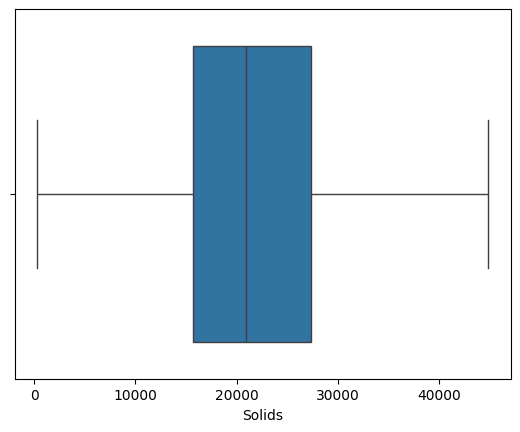

In [524]:
sns.boxplot(x=df_cleaned['Solids'])

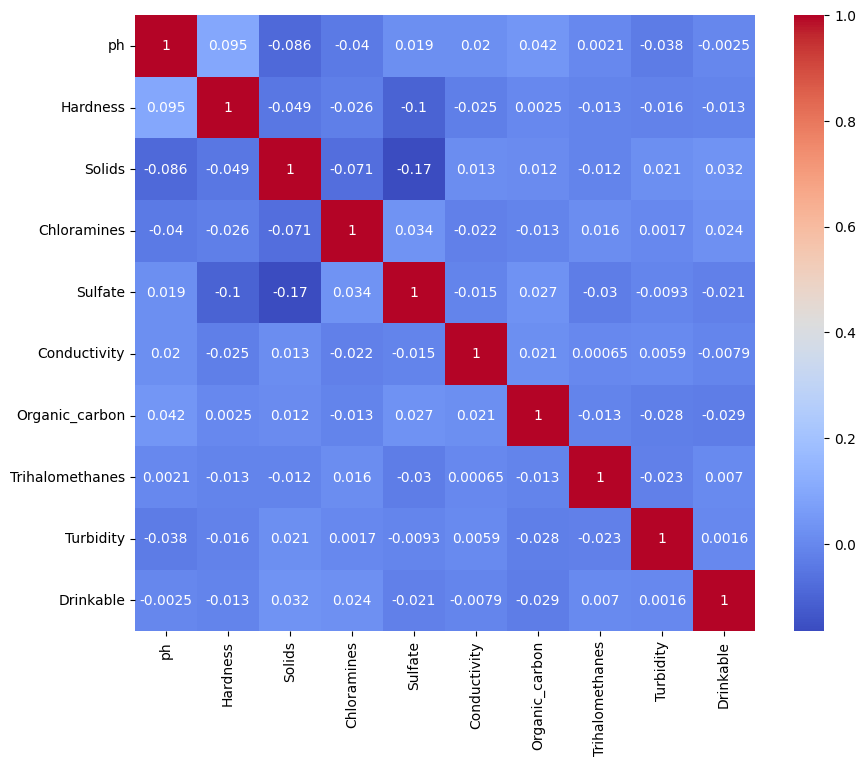

In [525]:
plt.figure(figsize=(10, 8))  # Increase width and height as needed
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

In [526]:
for var in df_cleaned.columns:
    print(df_cleaned[var].value_counts() / float(len(df_cleaned)))

ph
11.015527    0.007631
3.139631     0.006410
8.180755     0.000305
7.010243     0.000305
8.179890     0.000305
               ...   
7.741245     0.000305
4.187491     0.000305
7.808012     0.000305
5.895949     0.000305
8.154532     0.000305
Name: count, Length: 2741, dtype: float64
Hardness
117.125160    0.013431
276.392834    0.011905
204.258263    0.000305
223.296216    0.000305
195.118030    0.000305
                ...   
167.887629    0.000305
183.461310    0.000305
230.179573    0.000305
212.274645    0.000305
205.128303    0.000305
Name: count, Length: 3195, dtype: float64
Solids
44831.869873    0.014347
19168.526773    0.000305
37000.955670    0.000305
18736.190902    0.000305
12289.900922    0.000305
                  ...   
21809.709834    0.000305
17037.725367    0.000305
37118.255436    0.000305
31161.368388    0.000305
13769.860238    0.000305
Name: count, Length: 3230, dtype: float64
Chloramines
3.146221     0.009463
11.096086    0.009158
7.574082     0.000305
6.62259

Visualizing Distribution Of Drinkable And Non Drinkable Water

/tmp/ipython-input-772815180.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drinkable', data=df_cleaned, ax=ax[1], palette='Set2')


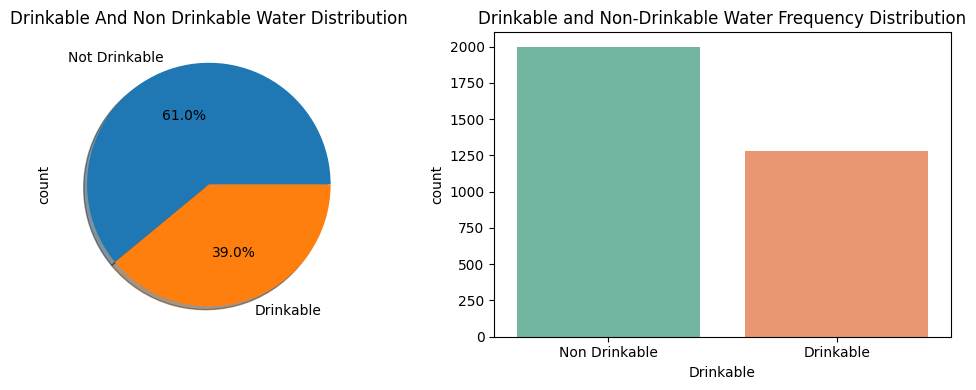

In [527]:
#Pie chart

fig, ax = plt.subplots(1,2,figsize=(10, 4))
df_cleaned['Drinkable'].value_counts().plot.pie(
    labels=['Not Drinkable', 'Drinkable'],  # Adjust if your labels are different
    autopct='%1.1f%%',
    explode=[0, 0],
    shadow=True,
    ax=ax[0]

)
ax[0].set_title('Drinkable And Non Drinkable Water Distribution')

#Bar chart for frequency distribution
sns.countplot(x='Drinkable', data=df_cleaned, ax=ax[1], palette='Set2')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Non Drinkable', 'Drinkable'])
ax[1].set_title('Drinkable and Non-Drinkable Water Frequency Distribution')

plt.tight_layout()
plt.show()

In [528]:
print(df_cleaned['Drinkable'].value_counts())

Drinkable
0    1998
1    1278
Name: count, dtype: int64


In [529]:
X = df_cleaned.iloc[:,:-1].values #independent variables
y = df_cleaned.iloc[:,-1].values #dependent variable

In [530]:
X

array([[           nan, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608007e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [531]:
y

array([0, 0, 0, ..., 1, 1, 1])

Plotting Each Independent Variables With Their Frequencies And Mark The Given Standard Parameter Rangers For Drinkable Water

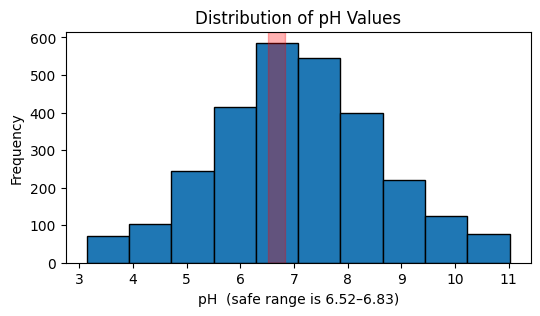

In [532]:
df_cleaned['ph'].plot(kind='hist', edgecolor='black', title='Distribution of pH Values',figsize=(6, 3))
plt.axvspan(6.52,6.83, color='Red', alpha=0.3, label='Safe pH Range')
plt.xlabel('pH  (safe range is 6.52–6.83)')
plt.ylabel('Frequency')
plt.show()



Add Binary Safty

Splitting Dataset Into Training And Test Sets

In [533]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [534]:
X_train

array([[6.62361357e+00, 2.03030141e+02, 1.71673013e+04, ...,
        1.59145001e+01, 6.50212290e+01, 2.91516595e+00],
       [6.68469974e+00, 1.93840931e+02, 3.41571845e+04, ...,
        8.81875657e+00, 6.66593522e+01, 4.03065983e+00],
       [6.83605995e+00, 2.05667718e+02, 1.83213275e+04, ...,
        1.38089233e+01, 7.07142255e+01, 4.95250825e+00],
       ...,
       [6.63036382e+00, 1.86761088e+02, 3.09390232e+04, ...,
        1.38157569e+01, 8.67531175e+01, 3.49058757e+00],
       [8.78316762e+00, 2.18032840e+02, 1.61835866e+04, ...,
        1.63545202e+01, 4.71009821e+01, 4.27413688e+00],
       [6.69815387e+00, 1.98286268e+02, 3.46758628e+04, ...,
        1.21766783e+01,            nan, 3.75817965e+00]])

In [535]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

Fill The Missing Values

In [536]:
# Convert X_test back to a DataFrame to use isnull().sum()
X_test_df = pd.DataFrame(X_train, columns=dataset.columns[:-1])

print("Number of NaN values in the test dataset:")
print(X_test_df.isnull().sum())

Number of NaN values in the test dataset:
ph                 395
Hardness             0
Solids               0
Chloramines          0
Sulfate            631
Conductivity         0
Organic_carbon       0
Trihalomethanes    127
Turbidity            0
dtype: int64


In [537]:

imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)

In [538]:
# Convert X_test back to a DataFrame to use isnull().sum()
X_train_df = pd.DataFrame(X_train, columns=dataset.columns[:-1])

print("Number of NaN values in the test dataset:")
print(X_train_df.isnull().sum())

Number of NaN values in the test dataset:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


###Sampleing

In [539]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [540]:
y_train_df = pd.DataFrame(y_train_res, columns=['Drinkable'])
print(y_train_df['Drinkable'].value_counts())

Drinkable
0    1586
1    1586
Name: count, dtype: int64


Feature Scaling

In [541]:
sc = StandardScaler()
X_train_scl = sc.fit_transform(X_train_res)

In [542]:
X_train_scl_df = pd.DataFrame(X_train_scl, columns=dataset.columns[:-1])
X_train_scl_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03,3.172000e+03
mean,1.252186e-14,-1.057526e-14,-1.606113e-15,-7.674399e-15,-2.290448e-14,-5.408592e-15,1.467230e-15,-1.469470e-15,-9.923406e-16
std,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00
min,-2.829799e+00,-2.533411e+00,-2.430750e+00,-2.611289e+00,-2.870845e+00,-2.954354e+00,-2.808226e+00,-2.781122e+00,-2.803322e+00
25%,-6.071591e-01,-6.230091e-01,-7.240484e-01,-6.547955e-01,-5.732765e-01,-7.400299e-01,-6.495056e-01,-6.466150e-01,-6.696561e-01
50%,-2.598076e-02,1.706625e-02,-1.531018e-01,-1.421072e-03,-1.750621e-02,-5.399284e-02,-2.776431e-02,1.292471e-02,-1.477647e-02
75%,5.798277e-01,6.331197e-01,6.039878e-01,6.432486e-01,5.915671e-01,6.763327e-01,6.738082e-01,6.701198e-01,6.795236e-01
max,2.812155e+00,2.533528e+00,2.608156e+00,2.636292e+00,2.876989e+00,2.889928e+00,2.862163e+00,2.803594e+00,2.838053e+00


In [543]:
X_test_imputed = imputer.transform(X_test)
X_test_scl = sc.transform(X_test_imputed)

In [544]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier( n_estimators=400,random_state=42)
classifier.fit(X_train_scl, y_train_res)

RandomForestClassifier(n_estimators=400, random_state=42)

In [545]:
X_test_scl_df = pd.DataFrame(X_test_scl, columns=dataset.columns[:-1])

print("Number of NaN values in the test dataset:")
print(X_test_scl_df.isnull().sum())

Number of NaN values in the test dataset:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


In [546]:
y_pred = classifier.predict(X_test_scl)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       412
           1       0.53      0.55      0.54       244

    accuracy                           0.65       656
   macro avg       0.63      0.63      0.63       656
weighted avg       0.65      0.65      0.65       656



In [547]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

[[294 118]
 [111 133]]


0.6509146341463414

In [548]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [549]:
y_test

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

Let's compare the performance of different models using a bar chart.

In [550]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

# Train the models (uncommented the models from previous cells)
linearModel = LogisticRegression()
linearModel.fit(X_train_scl, y_train_res)

svc_classifier = SVC(kernel='rbf', random_state=42)
svc_classifier.fit(X_train_scl, y_train_res)

classifier = RandomForestClassifier( n_estimators=400,random_state=42)
classifier.fit(X_train_scl, y_train_res)

dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train_scl, y_train_res)


# Make predictions
y_pred_lr = linearModel.predict(X_test_scl)
y_pred_svc = svc_classifier.predict(X_test_scl)
y_pred_rf = classifier.predict(X_test_scl)
y_pred_dt = dt_classifier.predict(X_test_scl)

# Calculate performance metrics
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree']
predictions = [y_pred_lr, y_pred_svc, y_pred_rf, y_pred_dt]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for y_pred in predictions:
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

display(performance_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.501524,0.368254,0.475410,0.415027
1,SVM,0.623476,0.495114,0.622951,0.551724
2,Random Forest,0.650915,0.529880,0.545082,0.537374
3,Decision Tree,0.608232,0.479100,0.610656,0.536937


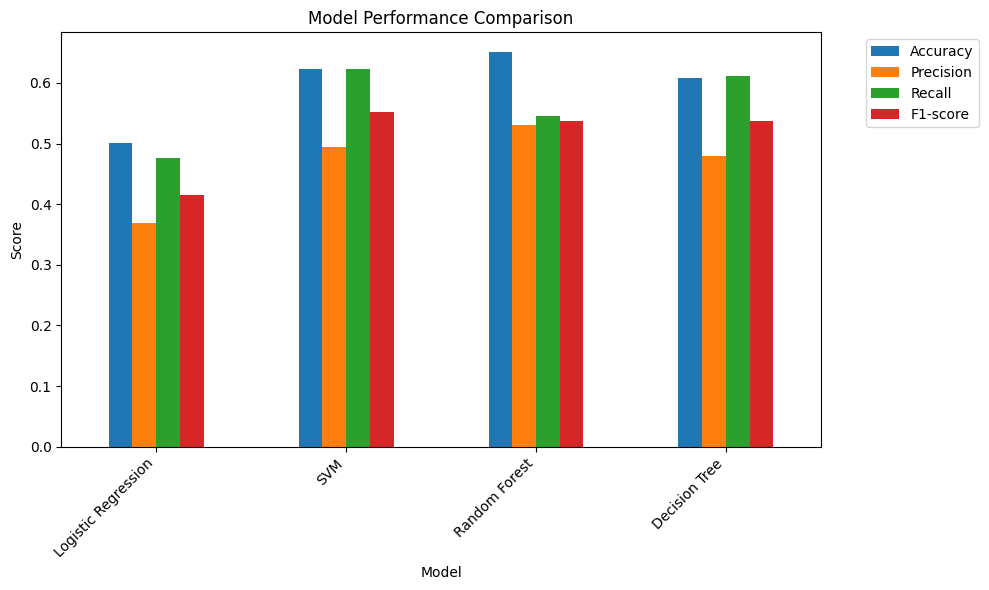

In [551]:
# Plot the performance metrics
performance_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-score'], kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

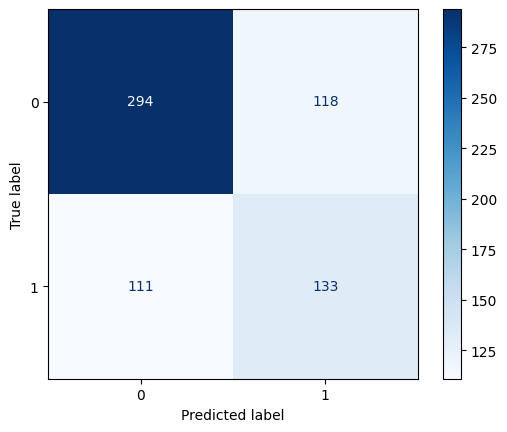

In [552]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
display.plot(cmap=plt.cm.Blues)